In [ ]:
### Ensemble 20
### Trying different combinations of µ0 and K_LDOC to find some underlying relationships
### Inspired by Ensemble 18_1

In [1]:
### Import libraries
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import os
import matplotlib as mpl

from matplotlib.colors import ListedColormap, BoundaryNorm, LogNorm
from matplotlib.cm import ScalarMappable
from matplotlib.patches import Rectangle
from matplotlib.patches import Polygon

plt.rcParams['text.usetex'] = True

# Enable the use of LaTeX for rendering text labels
mpl.rcParams['text.usetex'] = True

# Set the font family to sans-serif (Helvetica, Arial, etc.)
mpl.rcParams['font.family'] = 'sans-serif'

# Set the font style for the labels (optional)
mpl.rcParams['font.style'] = 'normal'

# Add a LaTeX preamble to change font family for numbers to sans-serif
mpl.rcParams['text.latex.preamble'] = r'\usepackage{sfmath}'


os.getcwd()


'c:\\Users\\konst\\Documents\\_Master_Thesis\\Code\\microCOSM_deep\\Ensemble20_µ0_K_LDOC'

In [2]:
data20 = pd.read_csv('Ensemble20.csv', sep=' ')

In [3]:
data20.head()

,id,dt(s),t(yr),rFeC_pb,mu0,m_l,m_q,kappa,kfe_p,kldoc_p,...,DIC(2),DIC(3),ALK(1),ALK(2),ALK(3),OCPCO2(1),OCPCO2(2),OCPCO2(3),ATPCO2,Limit
0,500000.0,3600.0,2000.0,0.00004,1.157407e-07,1.157407e-08,0.0,1.0,0.000001,0.010245,...,2104.785672,2374.904546,2397.977944,2392.517631,2399.461243,284.055878,267.348647,778.675353,0.0,324.0
1,500001.0,3600.0,2000.0,0.00004,1.157407e-07,1.157407e-08,0.0,1.0,0.000001,0.030735,...,2113.194127,2378.943460,2393.986252,2390.705339,2399.812736,273.678968,281.904578,808.036467,0.0,324.0
2,500002.0,3600.0,2000.0,0.00004,1.157407e-07,1.157407e-08,0.0,1.0,0.000001,0.102450,...,2120.414767,2373.940516,2392.615135,2392.218529,2401.065510,266.924228,291.233509,758.732731,0.0,224.0
3,500003.0,3600.0,2000.0,0.00004,1.157407e-07,1.157407e-08,0.0,1.0,0.000001,0.307350,...,2121.867667,2366.843446,2394.052745,2394.011173,2402.142997,266.884860,291.235171,699.170140,0.0,224.0
4,500004.0,3600.0,2000.0,0.00004,1.157407e-07,1.157407e-08,0.0,1.0,0.000001,1.024500,...,2121.868926,2366.835588,2394.054284,2394.012713,2402.144226,266.884837,291.235189,699.106882,0.0,224.0


In [4]:
data20.describe()

,id,dt(s),t(yr),rFeC_pb,mu0,m_l,m_q,kappa,kfe_p,kldoc_p,...,DIC(2),DIC(3),ALK(1),ALK(2),ALK(3),OCPCO2(1),OCPCO2(2),OCPCO2(3),ATPCO2,Limit
count,49.00000,49.0,49.0,4.900000e+01,4.900000e+01,4.900000e+01,49.0,49.0,4.900000e+01,49.000000,...,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000,49.0,49.000000
mean,500024.00000,3600.0,2000.0,4.000000e-05,2.387566e-05,1.157407e-08,0.0,1.0,1.024500e-06,2.113397,...,2109.122404,2371.293837,2396.184615,2390.575471,2400.140375,277.796599,276.313421,749.542794,0.0,297.163265
std,14.28869,0.0,0.0,4.107891e-20,3.961033e-05,1.671505e-24,0.0,0.0,1.283716e-21,3.506180,...,9.454324,9.825942,2.623259,2.166963,1.146671,8.636940,11.880044,64.533105,0.0,51.994530
min,500000.00000,3600.0,2000.0,4.000000e-05,1.157407e-07,1.157407e-08,0.0,1.0,1.024500e-06,0.010245,...,2098.669160,2325.297472,2392.263999,2388.028815,2399.251217,266.884829,262.592947,482.305397,0.0,224.000000
25%,500012.00000,3600.0,2000.0,4.000000e-05,3.472222e-07,1.157407e-08,0.0,1.0,1.024500e-06,0.030735,...,2100.117008,2367.669593,2394.052737,2388.769811,2399.293777,266.929141,264.105411,720.489969,0.0,224.000000
50%,500024.00000,3600.0,2000.0,4.000000e-05,3.472222e-06,1.157407e-08,0.0,1.0,1.024500e-06,0.307350,...,2104.647050,2373.847122,2396.627071,2389.949013,2399.428715,281.453714,271.149169,770.149612,0.0,324.000000
75%,500036.00000,3600.0,2000.0,4.000000e-05,3.472222e-05,1.157407e-08,0.0,1.0,1.024500e-06,3.073500,...,2120.100312,2375.423040,2398.908710,2391.987080,2400.896950,286.414620,291.234897,781.122002,0.0,324.000000
max,500048.00000,3600.0,2000.0,4.000000e-05,1.157407e-04,1.157407e-08,0.0,1.0,1.024500e-06,10.245000,...,2121.869393,2380.294247,2399.230486,2394.013283,2402.144681,287.495770,291.235196,819.173020,0.0,444.000000


In [5]:
data20['fe_lim_p(1)'] = (data20['Fe(1)'] / (data20['Fe(1)'] + data20['kfe_p'] * 1e6)) / (data20['LDOC(1)'] / (data20['LDOC(1)'] + data20['kldoc_p'] * 1e3)) < 1
data20['fe_lim_p(2)'] = (data20['Fe(2)'] / (data20['Fe(2)'] + data20['kfe_p'] * 1e6)) / (data20['LDOC(2)'] / (data20['LDOC(2)'] + data20['kldoc_p'] * 1e3)) < 1
data20['fe_lim_p(3)'] = (data20['Fe(3)'] / (data20['Fe(3)'] + data20['kfe_p'] * 1e6)) / (data20['LDOC(3)'] / (data20['LDOC(3)'] + data20['kldoc_p'] * 1e3)) < 1


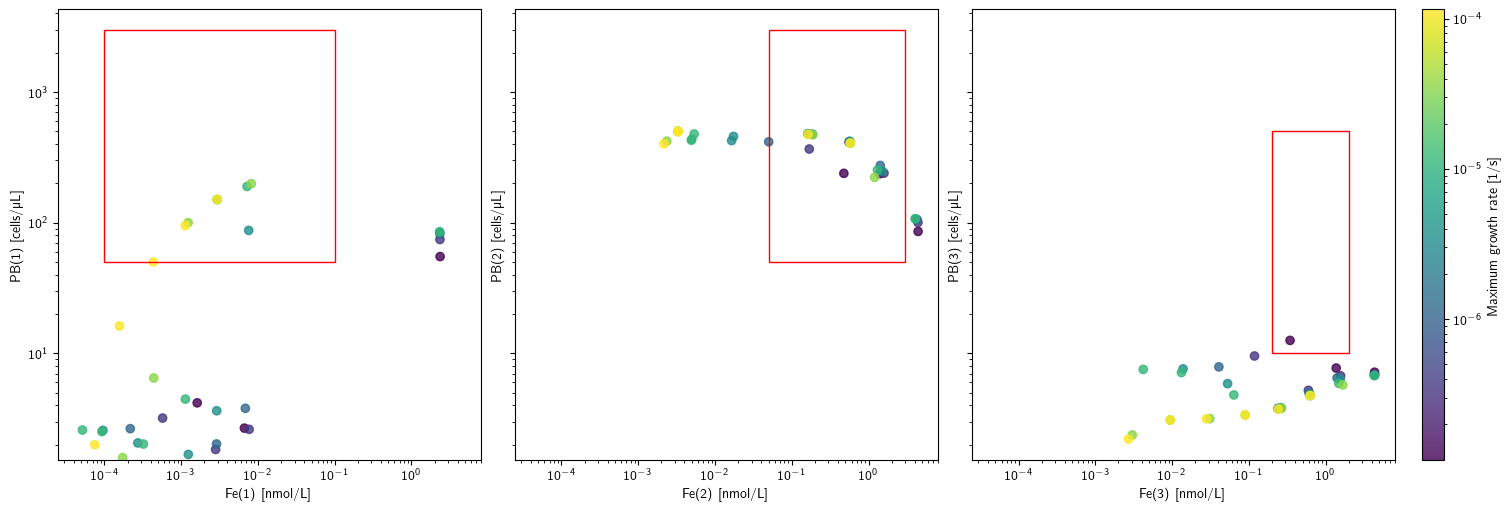

In [28]:
### Started on a false premise
### Can still learn sth about the relationship between µ0 and K_LDOC


fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data20['Fe(1)'], data20['PB(1)'], c=data20['mu0'], cmap='viridis', marker='o', alpha=0.8, norm=LogNorm())
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
# axs[0].set_xlim(1E-5, 1E1)
rect = Rectangle((1E-4, 50), 0.1 - 1E-4, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Fe concentration in the SO between 1E-4 and 0.1 nmol/kg (or nmol/L) -- must be subnanomolar
### Boyd, P., Ellwood, M. The biogeochemical cycle of iron in the ocean. Nature Geosci 3, 675–682 (2010). https://doi.org/10.1038/ngeo964
### https://doi.org/10.1016/j.dsr.2004.09.008 (Coale 2005)
### One could also use GEOTRACES - minimum value is 0.0098 nmol/kg, but values go much higher (as much as 25 nmol/kg)
### Only very limited sampling, rely on other publications

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data20['Fe(2)'], data20['PB(2)'], c=data20['mu0'], cmap='viridis', marker='o', alpha=0.8, norm=LogNorm())
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 50), 3 - 0.05, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range
### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data20['Fe(3)'], data20['PB(3)'], c=data20['mu0'], cmap='viridis', marker='o', alpha=0.8, norm=LogNorm())
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 10), 2 - 0.2, 500 - 10, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Maximum growth rate [1/s]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### Can get Fe in the right range, but PB is too low


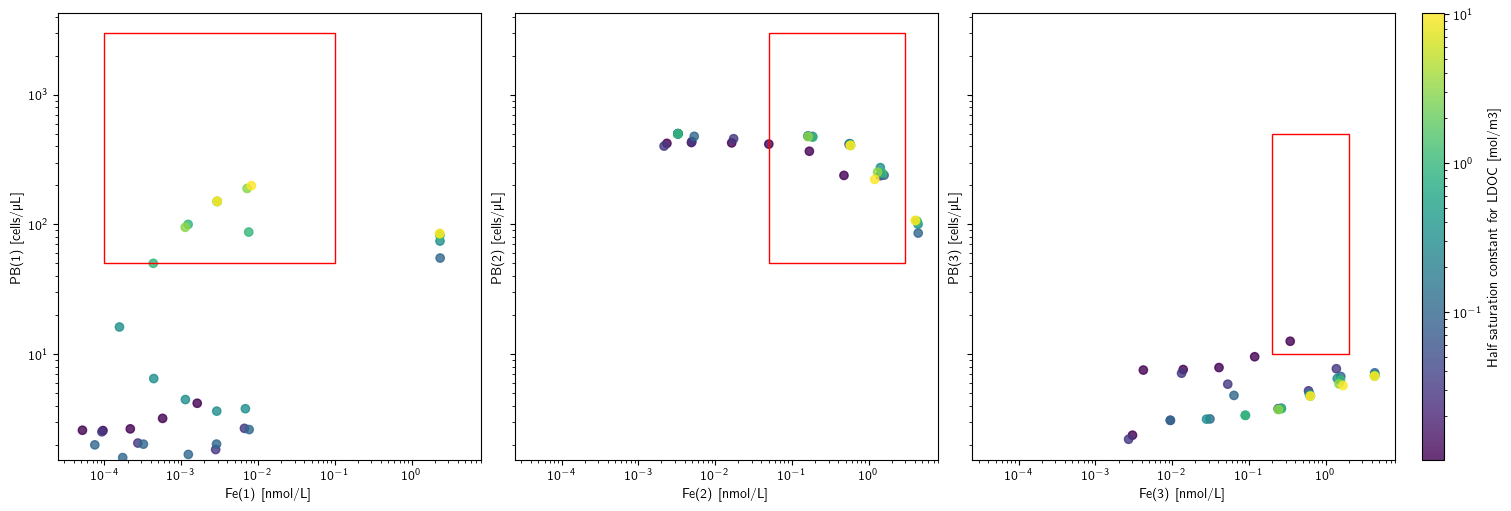

In [23]:
### Started on a false premise
### Can still learn sth about the relationship between µ0 and K_LDOC


fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data20['Fe(1)'], data20['PB(1)'], c=data20['kldoc_p'], cmap='viridis', marker='o', alpha=0.8, norm=LogNorm())
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
# axs[0].set_xlim(1E-5, 1E1)
rect = Rectangle((1E-4, 50), 0.1 - 1E-4, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Fe concentration in the SO between 1E-4 and 0.1 nmol/kg (or nmol/L) -- must be subnanomolar
### Boyd, P., Ellwood, M. The biogeochemical cycle of iron in the ocean. Nature Geosci 3, 675–682 (2010). https://doi.org/10.1038/ngeo964
### https://doi.org/10.1016/j.dsr.2004.09.008 (Coale 2005)
### One could also use GEOTRACES - minimum value is 0.0098 nmol/kg, but values go much higher (as much as 25 nmol/kg)
### Only very limited sampling, rely on other publications

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data20['Fe(2)'], data20['PB(2)'], c=data20['kldoc_p'], cmap='viridis', marker='o', alpha=0.8, norm=LogNorm())
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 50), 3 - 0.05, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range
### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data20['Fe(3)'], data20['PB(3)'], c=data20['kldoc_p'], cmap='viridis', marker='o', alpha=0.8, norm=LogNorm())
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 10), 2 - 0.2, 500 - 10, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Half saturation constant for LDOC [mol/m3]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()




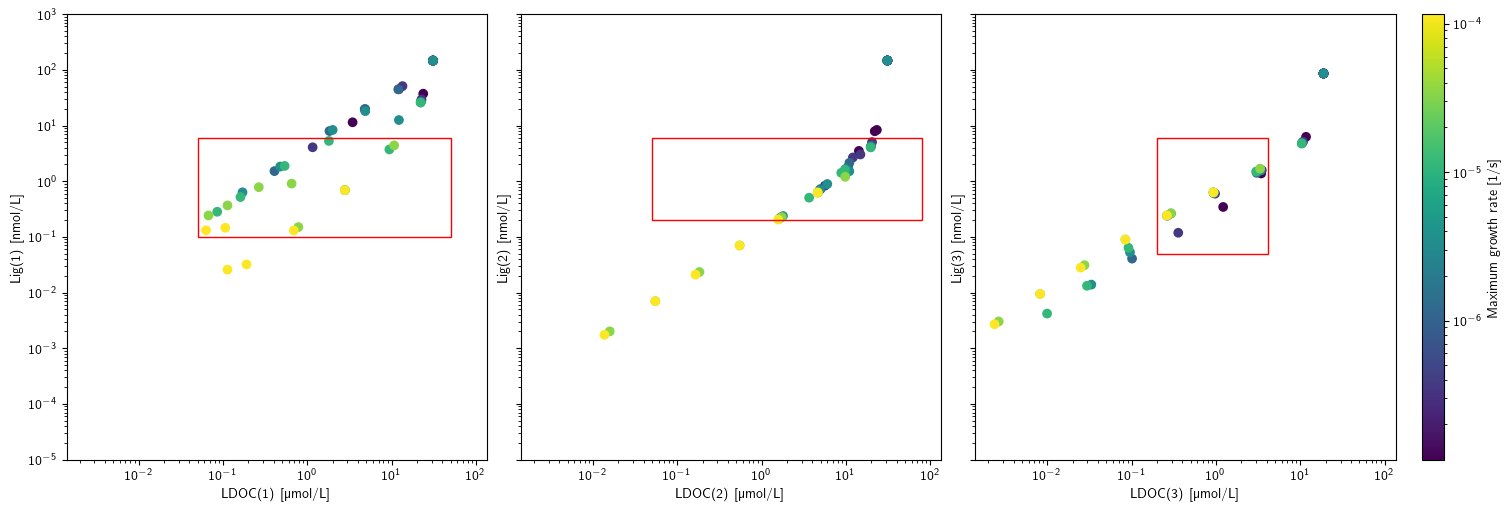

In [29]:
### Ligand vs LDOC scatterplot

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

sc1 = axs[0].scatter(data20['LDOC(1)'], data20['Lig(1)'], c=data20['mu0'], cmap='viridis', marker='o', alpha=1, norm=LogNorm())
axs[0].set_xlabel('LDOC(1) [µmol/L]')
axs[0].set_ylabel('Lig(1) [nmol/L]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
axs[0].set_ylim(1E-5, 1E3)
rect = Rectangle((0.05, 0.1), 50 - 0.05, 6 - 0.1, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### LDOC must be higher than ligand concentration * rCLig and it must be lower the DOC concentration
### DOC concentrations are not available for the SO in GEOTRACES or in the Hansell data
### Efficient dissolved organic carbon production and export in the oligotrophic ocean: https://doi.org/10.1038/s41467-017-02227-3
###  DOC in the Southern Ocean is lower than ~50 µmol/kg


sc2 = axs[1].scatter(data20['LDOC(2)'], data20['Lig(2)'], c=data20['mu0'], cmap='viridis', marker='o', alpha=1, norm=LogNorm())
axs[1].set_xlabel('LDOC(2) [µmol/L]')
axs[1].set_ylabel('Lig(2) [nmol/L]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 0.2), 80 - 0.05, 6 - 0.2, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### DOC concentration in the North Atlantic reaches maximal 80 µmol/kg, LDOC must be lower than that
### Also for the rest of the ocean DOC is rarely higher than 80 µmol/kg (exeption: Mediterranean Sea, Black Sea, Baltic Sea)
### LDOC must be higher than ligand concentration * rCLig ~ 50 nmol/kg (maximal for rCLig = 30)

sc3 = axs[2].scatter(data20['LDOC(3)'], data20['Lig(3)'], c=data20['mu0'], cmap='viridis', marker='o', alpha=1, norm=LogNorm())
axs[2].set_xlabel('LDOC(3) [µmol/L]')
axs[2].set_ylabel('Lig(3) [nmol/L]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 0.05), 4 - 0.05, 6 - 0.2, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)
### DOC in the deep ocean reaches approximately 40 µmol/kg, LDOC must much lower that that
### Set maximum to 4 µmol/kg (~10% of DOC concentration, already very high)

cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Maximum growth rate [1/s]')

In [12]:
data20['kldoc_p'].unique()

array([ 0.010245,  0.030735,  0.10245 ,  0.30735 ,  1.0245  ,  3.0735  ,
       10.245   ])

In [ ]:
### do plotting as before, but with a fixed value for K_LDOC

fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data20['Fe(1)'], data20['PB(1)'], c=data20['mu0'], cmap='viridis', marker='o', alpha=0.5, norm=LogNorm())


In [15]:
### Select only a single value of K_LDOC

data20_kldoc1 = data20[data20['kldoc_p'] == data20['kldoc_p'].unique()[0]]
data20_kldoc2 = data20[data20['kldoc_p'] == data20['kldoc_p'].unique()[1]]
data20_kldoc3 = data20[data20['kldoc_p'] == data20['kldoc_p'].unique()[2]]
data20_kldoc4 = data20[data20['kldoc_p'] == data20['kldoc_p'].unique()[3]]
data20_kldoc5 = data20[data20['kldoc_p'] == data20['kldoc_p'].unique()[4]]
data20_kldoc6 = data20[data20['kldoc_p'] == data20['kldoc_p'].unique()[5]]
data20_kldoc7 = data20[data20['kldoc_p'] == data20['kldoc_p'].unique()[6]]

In [17]:
data20_kldoc1.shape

(7, 48)

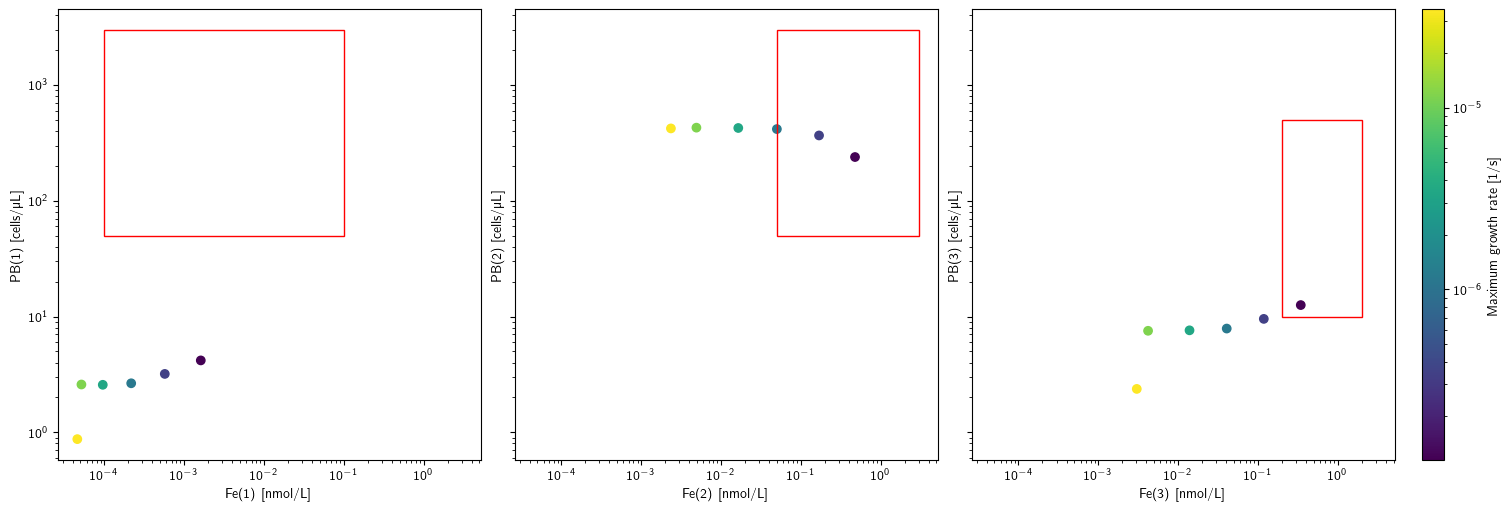

In [19]:
### Started on a false premise
### Can still learn sth about the relationship between µ0 and K_LDOC


fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data20_kldoc1['Fe(1)'], data20_kldoc1['PB(1)'], c=data20_kldoc1['mu0'], cmap='viridis', marker='o', alpha=1, norm=LogNorm())
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
# axs[0].set_xlim(1E-5, 1E1)
rect = Rectangle((1E-4, 50), 0.1 - 1E-4, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Fe concentration in the SO between 1E-4 and 0.1 nmol/kg (or nmol/L) -- must be subnanomolar
### Boyd, P., Ellwood, M. The biogeochemical cycle of iron in the ocean. Nature Geosci 3, 675–682 (2010). https://doi.org/10.1038/ngeo964
### https://doi.org/10.1016/j.dsr.2004.09.008 (Coale 2005)
### One could also use GEOTRACES - minimum value is 0.0098 nmol/kg, but values go much higher (as much as 25 nmol/kg)
### Only very limited sampling, rely on other publications

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data20_kldoc1['Fe(2)'], data20_kldoc1['PB(2)'], c=data20_kldoc1['mu0'], cmap='viridis', marker='o', alpha=1, norm=LogNorm())
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 50), 3 - 0.05, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range
### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data20_kldoc1['Fe(3)'], data20_kldoc1['PB(3)'], c=data20_kldoc1['mu0'], cmap='viridis', marker='o', alpha=1, norm=LogNorm())
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 10), 2 - 0.2, 500 - 10, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Maximum growth rate [1/s]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### Can get Fe in the right range, but PB is too low


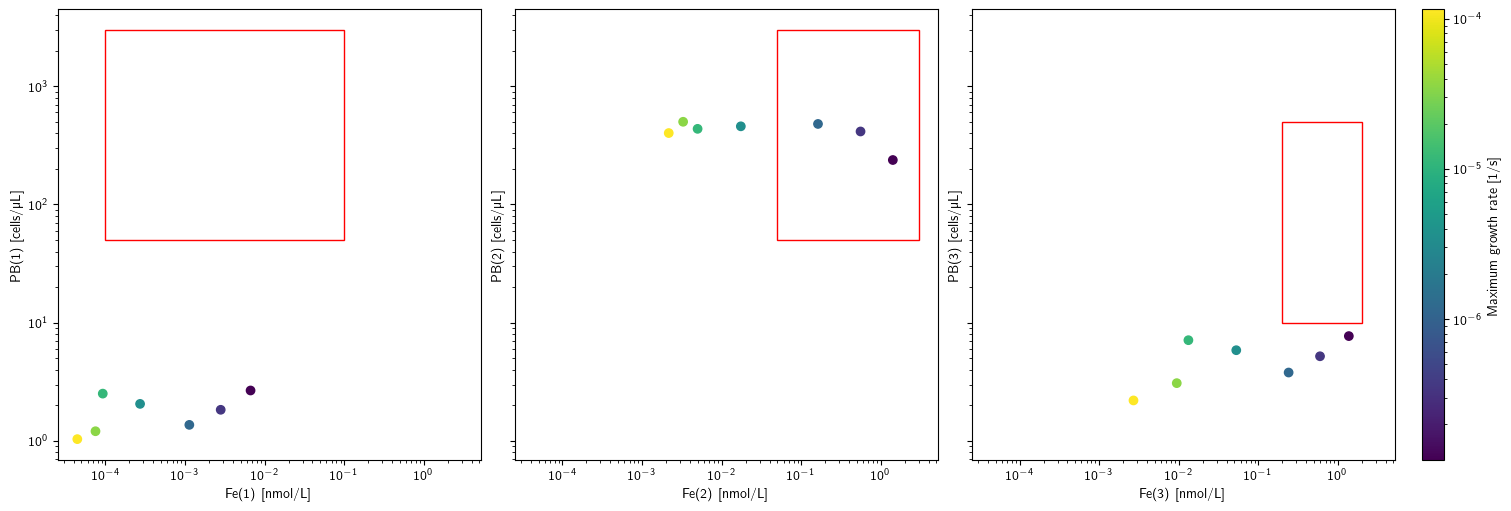

In [21]:
### Started on a false premise
### Can still learn sth about the relationship between µ0 and K_LDOC


fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data20_kldoc2['Fe(1)'], data20_kldoc2['PB(1)'], c=data20_kldoc2['mu0'], cmap='viridis', marker='o', alpha=1, norm=LogNorm())
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
# axs[0].set_xlim(1E-5, 1E1)
rect = Rectangle((1E-4, 50), 0.1 - 1E-4, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Fe concentration in the SO between 1E-4 and 0.1 nmol/kg (or nmol/L) -- must be subnanomolar
### Boyd, P., Ellwood, M. The biogeochemical cycle of iron in the ocean. Nature Geosci 3, 675–682 (2010). https://doi.org/10.1038/ngeo964
### https://doi.org/10.1016/j.dsr.2004.09.008 (Coale 2005)
### One could also use GEOTRACES - minimum value is 0.0098 nmol/kg, but values go much higher (as much as 25 nmol/kg)
### Only very limited sampling, rely on other publications

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data20_kldoc2['Fe(2)'], data20_kldoc2['PB(2)'], c=data20_kldoc2['mu0'], cmap='viridis', marker='o', alpha=1, norm=LogNorm())
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 50), 3 - 0.05, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range
### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data20_kldoc2['Fe(3)'], data20_kldoc2['PB(3)'], c=data20_kldoc2['mu0'], cmap='viridis', marker='o', alpha=1, norm=LogNorm())
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 10), 2 - 0.2, 500 - 10, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Maximum growth rate [1/s]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### Can get Fe in the right range, but PB is too low


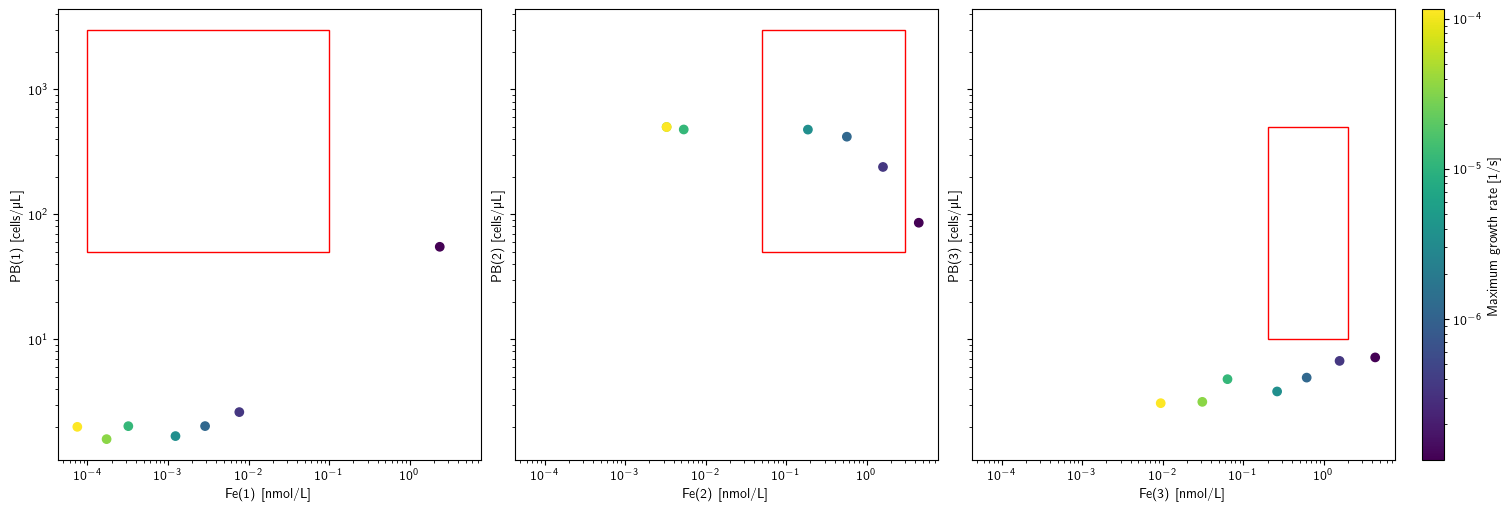

In [22]:
### Started on a false premise
### Can still learn sth about the relationship between µ0 and K_LDOC


fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data20_kldoc3['Fe(1)'], data20_kldoc3['PB(1)'], c=data20_kldoc3['mu0'], cmap='viridis', marker='o', alpha=1, norm=LogNorm())
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
# axs[0].set_xlim(1E-5, 1E1)
rect = Rectangle((1E-4, 50), 0.1 - 1E-4, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Fe concentration in the SO between 1E-4 and 0.1 nmol/kg (or nmol/L) -- must be subnanomolar
### Boyd, P., Ellwood, M. The biogeochemical cycle of iron in the ocean. Nature Geosci 3, 675–682 (2010). https://doi.org/10.1038/ngeo964
### https://doi.org/10.1016/j.dsr.2004.09.008 (Coale 2005)
### One could also use GEOTRACES - minimum value is 0.0098 nmol/kg, but values go much higher (as much as 25 nmol/kg)
### Only very limited sampling, rely on other publications

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data20_kldoc3['Fe(2)'], data20_kldoc3['PB(2)'], c=data20_kldoc3['mu0'], cmap='viridis', marker='o', alpha=1, norm=LogNorm())
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 50), 3 - 0.05, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range
### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data20_kldoc3['Fe(3)'], data20_kldoc3['PB(3)'], c=data20_kldoc3['mu0'], cmap='viridis', marker='o', alpha=1, norm=LogNorm())
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 10), 2 - 0.2, 500 - 10, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Maximum growth rate [1/s]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### Can get Fe in the right range, but PB is too low


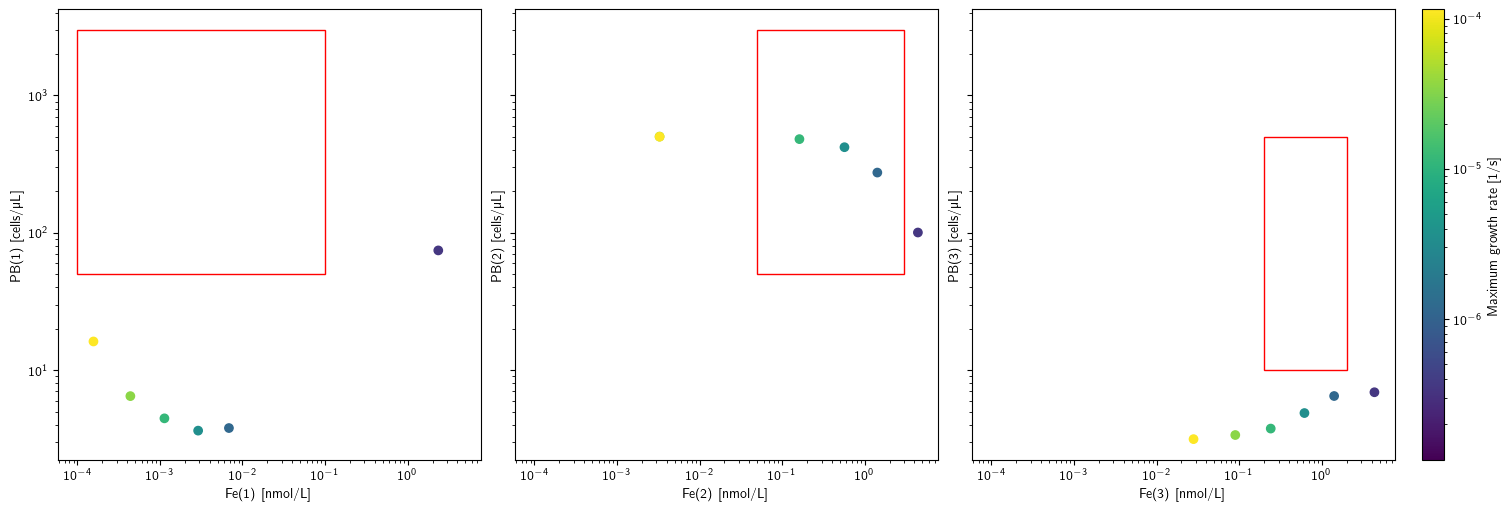

In [24]:
### Started on a false premise
### Can still learn sth about the relationship between µ0 and K_LDOC


fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data20_kldoc4['Fe(1)'], data20_kldoc4['PB(1)'], c=data20_kldoc4['mu0'], cmap='viridis', marker='o', alpha=1, norm=LogNorm())
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
# axs[0].set_xlim(1E-5, 1E1)
rect = Rectangle((1E-4, 50), 0.1 - 1E-4, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Fe concentration in the SO between 1E-4 and 0.1 nmol/kg (or nmol/L) -- must be subnanomolar
### Boyd, P., Ellwood, M. The biogeochemical cycle of iron in the ocean. Nature Geosci 3, 675–682 (2010). https://doi.org/10.1038/ngeo964
### https://doi.org/10.1016/j.dsr.2004.09.008 (Coale 2005)
### One could also use GEOTRACES - minimum value is 0.0098 nmol/kg, but values go much higher (as much as 25 nmol/kg)
### Only very limited sampling, rely on other publications

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data20_kldoc4['Fe(2)'], data20_kldoc4['PB(2)'], c=data20_kldoc4['mu0'], cmap='viridis', marker='o', alpha=1, norm=LogNorm())
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 50), 3 - 0.05, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range
### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data20_kldoc4['Fe(3)'], data20_kldoc4['PB(3)'], c=data20_kldoc4['mu0'], cmap='viridis', marker='o', alpha=1, norm=LogNorm())
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 10), 2 - 0.2, 500 - 10, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Maximum growth rate [1/s]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### Can get Fe in the right range, but PB is too low


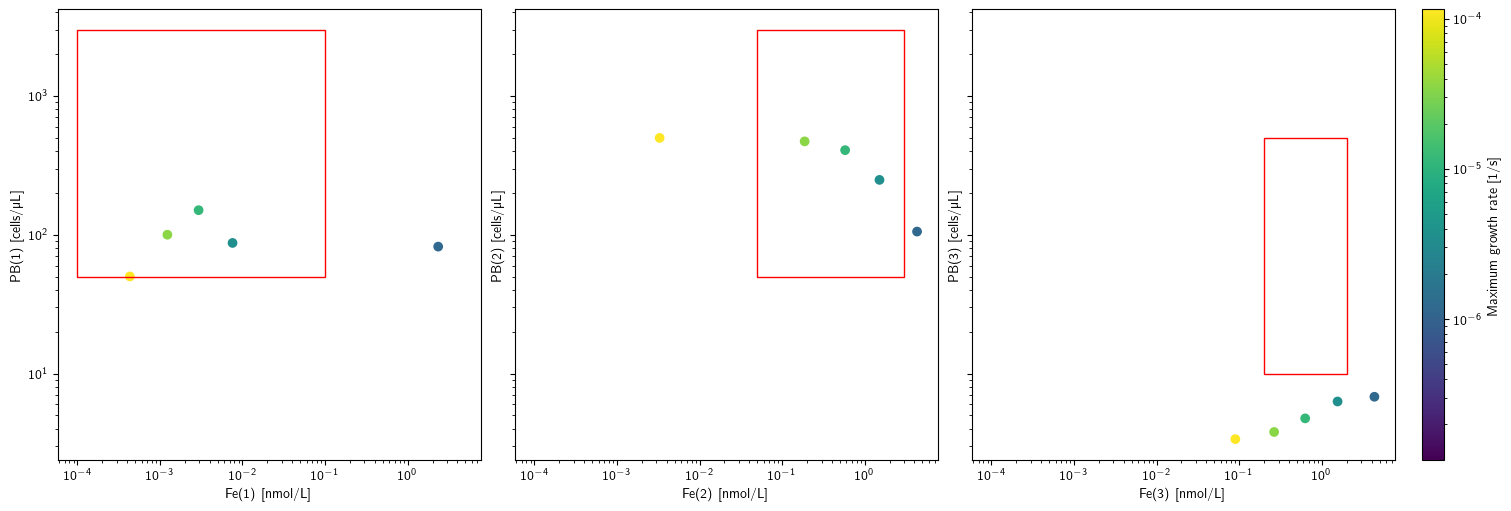

In [25]:
### Started on a false premise
### Can still learn sth about the relationship between µ0 and K_LDOC


fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data20_kldoc5['Fe(1)'], data20_kldoc5['PB(1)'], c=data20_kldoc5['mu0'], cmap='viridis', marker='o', alpha=1, norm=LogNorm())
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
# axs[0].set_xlim(1E-5, 1E1)
rect = Rectangle((1E-4, 50), 0.1 - 1E-4, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Fe concentration in the SO between 1E-4 and 0.1 nmol/kg (or nmol/L) -- must be subnanomolar
### Boyd, P., Ellwood, M. The biogeochemical cycle of iron in the ocean. Nature Geosci 3, 675–682 (2010). https://doi.org/10.1038/ngeo964
### https://doi.org/10.1016/j.dsr.2004.09.008 (Coale 2005)
### One could also use GEOTRACES - minimum value is 0.0098 nmol/kg, but values go much higher (as much as 25 nmol/kg)
### Only very limited sampling, rely on other publications

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data20_kldoc5['Fe(2)'], data20_kldoc5['PB(2)'], c=data20_kldoc5['mu0'], cmap='viridis', marker='o', alpha=1, norm=LogNorm())
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 50), 3 - 0.05, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range
### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data20_kldoc5['Fe(3)'], data20_kldoc5['PB(3)'], c=data20_kldoc5['mu0'], cmap='viridis', marker='o', alpha=1, norm=LogNorm())
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 10), 2 - 0.2, 500 - 10, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Maximum growth rate [1/s]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### Can get Fe in the right range, but PB is too low


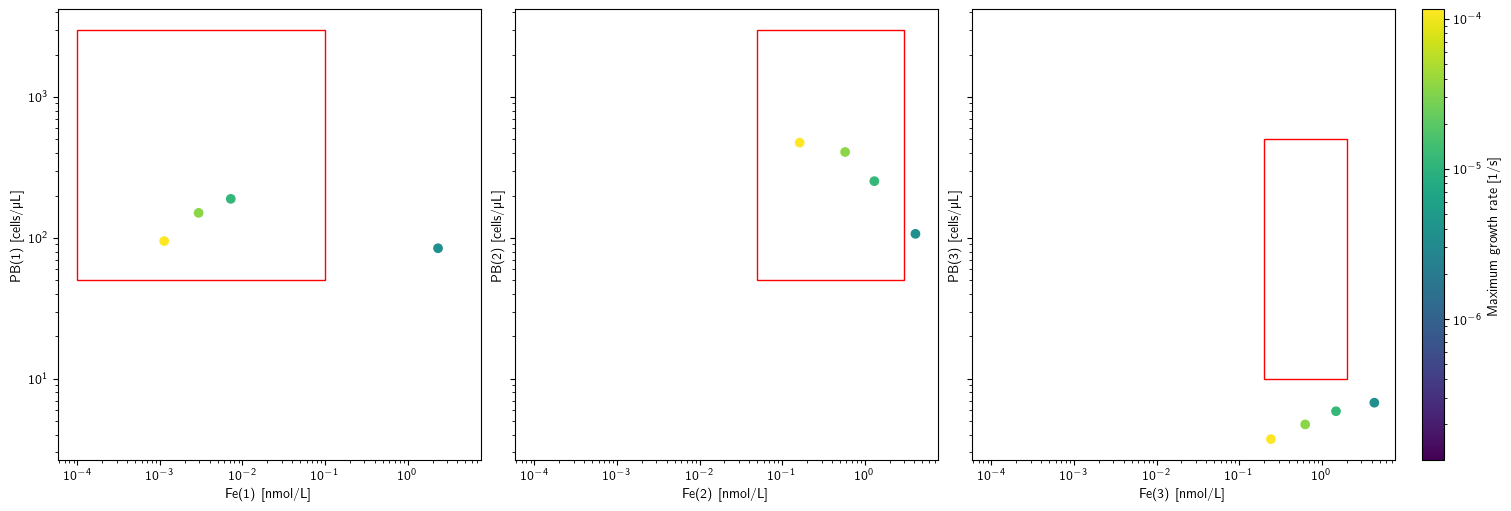

In [26]:
### Started on a false premise
### Can still learn sth about the relationship between µ0 and K_LDOC


fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data20_kldoc6['Fe(1)'], data20_kldoc6['PB(1)'], c=data20_kldoc6['mu0'], cmap='viridis', marker='o', alpha=1, norm=LogNorm())
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
# axs[0].set_xlim(1E-5, 1E1)
rect = Rectangle((1E-4, 50), 0.1 - 1E-4, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Fe concentration in the SO between 1E-4 and 0.1 nmol/kg (or nmol/L) -- must be subnanomolar
### Boyd, P., Ellwood, M. The biogeochemical cycle of iron in the ocean. Nature Geosci 3, 675–682 (2010). https://doi.org/10.1038/ngeo964
### https://doi.org/10.1016/j.dsr.2004.09.008 (Coale 2005)
### One could also use GEOTRACES - minimum value is 0.0098 nmol/kg, but values go much higher (as much as 25 nmol/kg)
### Only very limited sampling, rely on other publications

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data20_kldoc6['Fe(2)'], data20_kldoc6['PB(2)'], c=data20_kldoc6['mu0'], cmap='viridis', marker='o', alpha=1, norm=LogNorm())
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 50), 3 - 0.05, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range
### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data20_kldoc6['Fe(3)'], data20_kldoc6['PB(3)'], c=data20_kldoc6['mu0'], cmap='viridis', marker='o', alpha=1, norm=LogNorm())
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 10), 2 - 0.2, 500 - 10, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Maximum growth rate [1/s]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### Can get Fe in the right range, but PB is too low


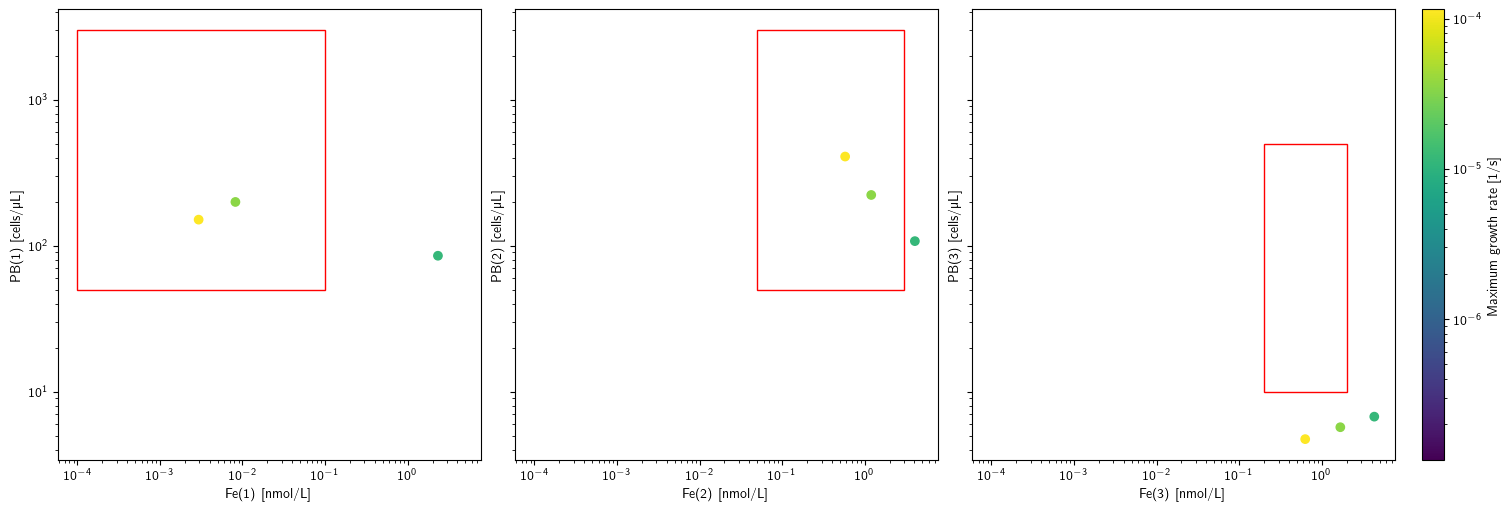

In [27]:
### Started on a false premise
### Can still learn sth about the relationship between µ0 and K_LDOC


fig, axs = plt.subplots(1, 3, figsize=(15, 5), sharex=True, sharey=True, constrained_layout=True)

# Scatter plot for Fe(1) vs PB(1)
sc1 = axs[0].scatter(data20_kldoc7['Fe(1)'], data20_kldoc7['PB(1)'], c=data20_kldoc7['mu0'], cmap='viridis', marker='o', alpha=1, norm=LogNorm())
axs[0].set_xlabel('Fe(1) [nmol/L]')
axs[0].set_ylabel('PB(1) [cells/µL]')
axs[0].set_xscale('log')
axs[0].set_yscale('log')
# axs[0].set_xlim(1E-5, 1E1)
rect = Rectangle((1E-4, 50), 0.1 - 1E-4, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[0].add_patch(rect)
### Fe concentration in the SO between 1E-4 and 0.1 nmol/kg (or nmol/L) -- must be subnanomolar
### Boyd, P., Ellwood, M. The biogeochemical cycle of iron in the ocean. Nature Geosci 3, 675–682 (2010). https://doi.org/10.1038/ngeo964
### https://doi.org/10.1016/j.dsr.2004.09.008 (Coale 2005)
### One could also use GEOTRACES - minimum value is 0.0098 nmol/kg, but values go much higher (as much as 25 nmol/kg)
### Only very limited sampling, rely on other publications

### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL (lower possible as well???)
### selected maximum: 30E5 cells/ml = 3000 cells/µL

# Scatter plot for Fe(2) vs PB(2)
sc2 = axs[1].scatter(data20_kldoc7['Fe(2)'], data20_kldoc7['PB(2)'], c=data20_kldoc7['mu0'], cmap='viridis', marker='o', alpha=1, norm=LogNorm())
axs[1].set_xlabel('Fe(2) [nmol/L]')
axs[1].set_ylabel('PB(2) [cells/µL]')
axs[1].set_xscale('log')
axs[1].set_yscale('log')
rect = Rectangle((0.05, 50), 3 - 0.05, 3000 - 50, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[1].add_patch(rect)
### Fe concentration taken from GEOTRACES for North Atlantic [90°N - 0°N, -90°W - -10°W]
### 0.05 nmol/kg - 3 nmol/kg
### Generally high variability, would be good to be rather in the middle of the range
### Bacterial abundance taken as a proxy for prokaryotic abundance
### Using the dataset from Hansell et al 2021, DOM Compilation, data handling with ODV
### All data points south of 40°S and in the upper 200 m
### selected minimum: 0.5E5 cells/ml = 50 cells/µL
### selected maximum: 30E5 cells/ml = 3000 cells/µL


# Scatter plot for Fe(3) vs PB(3)
sc3 = axs[2].scatter(data20_kldoc7['Fe(3)'], data20_kldoc7['PB(3)'], c=data20_kldoc7['mu0'], cmap='viridis', marker='o', alpha=1, norm=LogNorm())
axs[2].set_xlabel('Fe(3) [nmol/L]')
axs[2].set_ylabel('PB(3) [cells/µL]')
axs[2].set_xscale('log')
axs[2].set_yscale('log')
rect = Rectangle((0.2, 10), 2 - 0.2, 500 - 10, linewidth=1, edgecolor='red', facecolor='none', alpha=1)
axs[2].add_patch(rect)

### dFe concentration taken from GEOTRACES
### minimum that reflects the likely range: 0.2 nmol/kg
### Maximum value: 2 nmol/kg
### Here more strict than in the surface ocean, I really want to get this right!
### Also due to the longer residence time, there should be much less variation
### And there are more measurements, giving us more confidence in the observational constraints

### Prokaryotic abundance from Herndl Review paper 2023
### As before (0 dim model): 1E7 - 5E8 cells/L
### corresponding to: 10 - 500 cells/µL
### Also stricter here for the same reasons as above


cbar = fig.colorbar(sc3, ax=axs, orientation='vertical', pad=0.02)
cbar.set_label('Maximum growth rate [1/s]')

# Save or display the plot
# plt.savefig('scientific_paper_plot_discrete_cmap_markers.png', dpi=300, bbox_inches='tight')
plt.show()

### Can get Fe in the right range, but PB is too low
